<p align="center">
<img src="https://i.imgur.com/W4Qot5m.png" alt="Olist Dataset Cover" width="1200px">
</p>

## <b>1 <span style='color:#F1A424'>|</span> Initial Setup</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.1 |</span></b> Package Installation</b></p>
</div>

- `numpy` and `pandas` for basic data-manipulation
- `sklearn` and associated modules to run our machine learning algorithms
- `scipy` associated modules (`norm`) to compute the cosime similarity later on
- `seaborn` to output graphs
- Miscellaneous packages for flow of the notebook

In [ ]:
! pip install utils
! pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import scipy as sc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn import preprocessing

from scipy.linalg import norm

import seaborn as sns

from typing import List
from utils import *
import re
from collections import Counter
import sys

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.2 |</span></b> Connecting to Github and Google Drive</b></p>
</div>

- This notebook is connected to the associated Github repository for easy access and version contol
- Optionally, it is also tested and connected to Google Drive if possible

In [ ]:
if 'google.colab' in sys.modules:
    %cd /content
!rm -rf Datathon_F22
!git clone https://github.com/sunnydigital/Datathon_F22
%cd Datathon_F22

In [ ]:
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>1.3 |</span></b> Preprocessing Product Category Names</b></p>
</div>

- After initally reading in the `product_category_name_translation.csv` we need to transform the data into a useable format
- An initial inspection of the number of products uder each category is displayed
- The english translations for product names are given (from the associated column in the `product_category_name_translation.csv`)
- For each category, the individual words making up the category is split using `re.split`

In [ ]:
trans_df = pd.read_csv('datasets/product_category_name_translation.csv')

og_cat_name = trans_df['product_category_name'].to_numpy()
og_cat_name = np.append(og_cat_name, ['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer', 'pcs', 'other'])

og_name_to_idx = {}
for i, name in enumerate(og_cat_name):
  og_name_to_idx[name] = i
display(og_name_to_idx)

product_categories = trans_df['product_category_name_english'].to_numpy()
product_categories = np.append(product_categories, ['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer', 'pcs', 'other'])
display(product_categories)


product_categories_list = []
for category in product_categories:
   product_categories_list.append(re.split('_| ', category))

product_categories_list

{'beleza_saude': 0,
 'informatica_acessorios': 1,
 'automotivo': 2,
 'cama_mesa_banho': 3,
 'moveis_decoracao': 4,
 'esporte_lazer': 5,
 'perfumaria': 6,
 'utilidades_domesticas': 7,
 'telefonia': 8,
 'relogios_presentes': 9,
 'alimentos_bebidas': 10,
 'bebes': 11,
 'papelaria': 12,
 'tablets_impressao_imagem': 13,
 'brinquedos': 14,
 'telefonia_fixa': 15,
 'ferramentas_jardim': 16,
 'fashion_bolsas_e_acessorios': 17,
 'eletroportateis': 18,
 'consoles_games': 19,
 'audio': 20,
 'fashion_calcados': 21,
 'cool_stuff': 22,
 'malas_acessorios': 23,
 'climatizacao': 24,
 'construcao_ferramentas_construcao': 25,
 'moveis_cozinha_area_de_servico_jantar_e_jardim': 26,
 'construcao_ferramentas_jardim': 27,
 'fashion_roupa_masculina': 28,
 'pet_shop': 29,
 'moveis_escritorio': 30,
 'market_place': 31,
 'eletronicos': 32,
 'eletrodomesticos': 33,
 'artigos_de_festas': 34,
 'casa_conforto': 35,
 'construcao_ferramentas_ferramentas': 36,
 'agro_industria_e_comercio': 37,
 'moveis_colchao_e_estofad

array(['health_beauty', 'computers_accessories', 'auto', 'bed_bath_table',
       'furniture_decor', 'sports_leisure', 'perfumery', 'housewares',
       'telephony', 'watches_gifts', 'food_drink', 'baby', 'stationery',
       'tablets_printing_image', 'toys', 'fixed_telephony',
       'garden_tools', 'fashion_bags_accessories', 'small_appliances',
       'consoles_games', 'audio', 'fashion_shoes', 'cool_stuff',
       'luggage_accessories', 'air_conditioning',
       'construction_tools_construction',
       'kitchen_dining_laundry_garden_furniture',
       'costruction_tools_garden', 'fashion_male_clothing', 'pet_shop',
       'office_furniture', 'market_place', 'electronics',
       'home_appliances', 'party_supplies', 'home_confort',
       'costruction_tools_tools', 'agro_industry_and_commerce',
       'furniture_mattress_and_upholstery', 'books_technical',
       'home_construction', 'musical_instruments',
       'furniture_living_room', 'construction_tools_lights',
       'indust

[['health', 'beauty'],
 ['computers', 'accessories'],
 ['auto'],
 ['bed', 'bath', 'table'],
 ['furniture', 'decor'],
 ['sports', 'leisure'],
 ['perfumery'],
 ['housewares'],
 ['telephony'],
 ['watches', 'gifts'],
 ['food', 'drink'],
 ['baby'],
 ['stationery'],
 ['tablets', 'printing', 'image'],
 ['toys'],
 ['fixed', 'telephony'],
 ['garden', 'tools'],
 ['fashion', 'bags', 'accessories'],
 ['small', 'appliances'],
 ['consoles', 'games'],
 ['audio'],
 ['fashion', 'shoes'],
 ['cool', 'stuff'],
 ['luggage', 'accessories'],
 ['air', 'conditioning'],
 ['construction', 'tools', 'construction'],
 ['kitchen', 'dining', 'laundry', 'garden', 'furniture'],
 ['costruction', 'tools', 'garden'],
 ['fashion', 'male', 'clothing'],
 ['pet', 'shop'],
 ['office', 'furniture'],
 ['market', 'place'],
 ['electronics'],
 ['home', 'appliances'],
 ['party', 'supplies'],
 ['home', 'confort'],
 ['costruction', 'tools', 'tools'],
 ['agro', 'industry', 'and', 'commerce'],
 ['furniture', 'mattress', 'and', 'upholste

## <b>2 <span style='color:#F1A424'>|</span> GloVe Embeddings</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.1 |</span></b> Indexer Object and Embedding initialization</b></p>
</div>

- An Indexer Object is created to map words to a dictionary
- `read_wrod_embeddings` is used to interface between the stored GloVe-50d embeddings in the file `glove.6B.50d-relativized.txt` and the dictionary protocal defined previously in the Indexer Object
- Finally an indexer object, `word_indexer` and the embedded dictionary `embeddings` object is returned

In [ ]:
class Indexer(object):
    """
    Bijection between objects and integers starting at 0. Useful for mapping
    labels, features, etc. into coordinates of a vector space.

    Attributes:
        @objs_to_ints
        @ints_to_objs
    """
    def __init__(self):
        self.objs_to_ints = {}
        self.ints_to_objs = {}

    def __repr__(self):
        return str([str(self.get_object(i)) for i in range(0, len(self))])

    def __str__(self):
        return self.__repr__()

    def __len__(self):
        return len(self.objs_to_ints)

    def get_object(self, index):
        """
            @param index: integer index to look up
            @return: Returns the object corresponding to the particular index or None if not found
        """
        if (index not in self.ints_to_objs):
            return None
        else:
            return self.ints_to_objs[index]

    def contains(self, object):
        """
            @param object: object to look up
            @return: Returns True if it is in the Indexer, False otherwise
        """
        return self.index_of(object) != -1

    def index_of(self, object):
        """
            @param object: object to look up
            @return: Returns -1 if the object isn't present, index otherwise
        """
        if (object not in self.objs_to_ints):
            return -1
        else:
            return self.objs_to_ints[object]

    def add_and_get_index(self, object, add=True):
        """
        Adds the object to the index if it isn't present, always returns a nonnegative index
            @param object: object to look up or add
            @param add: True by default, False if we shouldn't add the object. If False, equivalent to index_of.
            @return: The index of the object
        """
        if not add:
            return self.index_of(object)
        if (object not in self.objs_to_ints):
            new_idx = len(self.objs_to_ints)
            self.objs_to_ints[object] = new_idx
            self.ints_to_objs[new_idx] = object
        return self.objs_to_ints[object]

In [ ]:
def read_word_embeddings(embeddings_file: str):
    """
    Loads the given embeddings (ASCII-formatted) into a WordEmbeddings object. Augments this with an UNK embedding
    that is the 0 vector. Reads in all embeddings with no filtering -- you should only use this for relativized
    word embedding files.
        @param embeddings_file: path to the file containing embeddings
        @return: WordEmbeddings object reflecting the words and their embeddings
    """
    f = open(embeddings_file)
    word_indexer = Indexer()
    vectors = []
    # Make position 0 a PAD token, which can be useful if you
    word_indexer.add_and_get_index("PAD")
    # Make position 1 the UNK token
    word_indexer.add_and_get_index("UNK")
    for line in f:
        if line.strip() != "":
            space_idx = line.find(' ')
            word = line[:space_idx]
            numbers = line[space_idx+1:]
            float_numbers = [float(number_str) for number_str in numbers.split()]
            vector = np.array(float_numbers)
            word_indexer.add_and_get_index(word)
            # Append the PAD and UNK vectors to start. Have to do this weirdly because we need to read the first line
            # of the file to see what the embedding dim is
            if len(vectors) == 0:
                vectors.append(np.zeros(vector.shape[0]))
                vectors.append(np.zeros(vector.shape[0]))
            vectors.append(vector)
    f.close()
    print("Read in " + repr(len(word_indexer)) + " vectors of size " + repr(vectors[0].shape[0]))
    # Turn vectors into a 2-D numpy array
    return word_indexer, np.array(vectors)

In [ ]:
word_indexer, embeddings = read_word_embeddings('glove/glove.6B.50d-relativized.txt')

Read in 14923 vectors of size 50


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.2 |</span></b> Embedding Concatenation</b></p>
</div>

- `get_embedding` is a functon defined to obtain the embedding for any product category, meant to deal with multiple words describing any category
- Two ways of dealing with multi-word properties of product categories are included:
  - `mean` where the mean of embedding values for each word in the the GloVe-50d dictionary is found, for each word across all 50 dimensions
  - `sum` where the sum of embedding values for each word in the GloVe-50d dictionary is found, for each word, summed across all 50 dimensions
- The embedding for each product category is returned based on the previously determined methodology for word handling

In [ ]:
def get_embedding(word_indexer, embeddings, product_categories, reduce='mean'):
    """
        @param word_indexer returns the index of the word in the embedding
        @param embeddings the embeddings matrix of all words in GloVe-50d
        @param product_categories the categories of all products represented in a [N x 1] array
        @return: The embeddings of each category when combined via one of the methods of 'mean' or 'sum' as provided
    """
    category_embeddings = {}
    for category, category_list in zip(product_categories, product_categories_list):
        category_embed = []
        for word in category_list:
            index_word = word_indexer.index_of(word)
            embed = embeddings[index_word]
            category_embed.append(embed)
        if reduce == 'mean': 
            embed = np.mean(category_embed, axis=0)
        if reduce == 'sum':
            embed = np.sum(category_embed, axis=0)
        category_embeddings[category] = embed
    
    return category_embeddings

In [ ]:
embeddings = get_embedding(word_indexer, embeddings, product_categories)
embeddings

{'perfumery': array([-0.45596  , -0.13718  , -0.23754  , -0.63402  , -0.10487  ,
        -0.42744  ,  0.83699  ,  0.23567  , -0.078916 ,  0.5      ,
         0.08264  ,  0.2316   ,  0.77999  ,  0.47049  , -0.32597  ,
        -0.51283  ,  0.30945  ,  0.47881  ,  0.55381  , -0.24994  ,
        -0.47739  , -0.073831 ,  0.072328 , -0.10644  ,  0.25275  ,
         0.97813  , -0.38809  ,  0.29865  ,  0.29393  ,  0.35823  ,
        -1.1929   ,  0.071931 ,  0.034599 ,  0.027147 , -0.38162  ,
         0.73098  ,  0.062593 , -0.14562  , -0.38141  , -0.072509 ,
         0.20806  , -0.54812  , -0.21912  ,  0.51654  ,  0.64665  ,
        -0.65962  ,  0.10605  ,  0.17607  ,  0.29246  ,  0.0042172]),
 'artes': array([-0.45596  , -0.13718  , -0.23754  , -0.63402  , -0.10487  ,
        -0.42744  ,  0.83699  ,  0.23567  , -0.078916 ,  0.5      ,
         0.08264  ,  0.2316   ,  0.77999  ,  0.47049  , -0.32597  ,
        -0.51283  ,  0.30945  ,  0.47881  ,  0.55381  , -0.24994  ,
        -0.47739  , -0.0

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.3 |</span></b> Cosine Similarity</b></p>
</div>

- The cosine similarity of any two product categories is the determined, given by the equation: $$ \frac{\vec{a} \cdot \vec{b}}{|a||b|} $$ where $\vec{a}$ and $\vec{b}$ are $N$ dimensional vectors
- The values are between $[-1,1]$, being similar in interpretation as a correlation
- Also returned is a dictionary mapping between the numerical name for a column in the `embedding_dict` and the categorical name

In [ ]:
len_categories = len(embeddings)
get_embeddings_lambda = lambda x: embeddings[x]
similarities = np.zeros((len_categories, len_categories))
emb_dict = {}

for i, (word1, emb1) in enumerate(embeddings.items()):
    for j, (word2, emb2) in enumerate(embeddings.items()):
        cosine_similarity = np.dot(emb1, emb2) / (norm(emb1) * norm(emb2))
        similarities[i,j] = cosine_similarity

In [ ]:
keys = enumerate(embeddings.keys())
embedding_dict = {}
for i, key in keys:
    embedding_dict[i] = key

embedding_dict

{0: 'perfumery',
 1: 'artes',
 2: 'sport_leisure',
 3: 'babies',
 4: 'domestic_utilities',
 5: 'musical instruments',
 6: 'cool_stuff',
 7: 'furniture_decoration',
 8: 'home appliances',
 9: 'toys',
 10: 'bed table bath',
 11: 'construction_tools_security',
 12: 'informatica_accessories',
 13: 'beauty_health',
 14: 'bags_accessories',
 15: 'garden_tools',
 16: 'furniture_office',
 17: 'automotive',
 18: 'electronic',
 19: 'fashion_shoes',
 20: 'telephony',
 21: 'stationary store',
 22: 'fashion_bolsas_e_acessorios',
 23: 'pcs',
 24: 'house_construction',
 25: 'watches_gifts',
 26: 'construction_tools_construction',
 27: 'pet_shop',
 28: 'small appliances',
 29: 'agro_industry_and_trade',
 30: 'in',
 31: 'living room furniture',
 32: 'signaling_and_security',
 33: 'air conditioning',
 34: 'consoles_games',
 35: 'general_interest_books',
 36: 'construction_tools_tools',
 37: 'fashion_underwear_e_moda_praia',
 38: 'fashion_clothes_men',
 39: 'furniture_cozinha_area_de_servico_jantar_e_jar

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>2.4 |</span></b> Similarity Matrix & Heatmap</b></p>
</div>

- A dataframe is created with similarity values for every product category
- Also made is a heatmap featuring all product categories, on a cool-warm scale from blue (loswest similarity) to red (highest similarity)
- Finally, the function `get_similarity` is created to obtain the similarity scores for any entered product category

In [ ]:
similarities_df = pd.DataFrame(similarities)
similarities_df = similarities_df.rename(columns=embedding_dict, index=embedding_dict)

similarities_df

perfumery     artes  sport_leisure  \
perfumery                                 1.000000  1.000000       0.407878   
artes                                     1.000000  1.000000       0.407878   
sport_leisure                             0.407878  0.407878       1.000000   
babies                                   -0.118951 -0.118951       0.122967   
domestic_utilities                        0.257968  0.257968       0.551266   
...                                            ...       ...            ...   
flores                                    1.000000  1.000000       0.407878   
kitchen_and_food_preparadores_portables   0.100799  0.100799       0.419741   
insurance_and_services                   -0.543074 -0.543074       0.122980   
furniture_colchao_and_upholstery          0.864288  0.864288       0.587471   
cds_dvds_musicais                         1.000000  1.000000       0.407878   

                                           babies  domestic_utilities  \
perfumery                               -0.118951            0.257968   
artes                                   -0.118951            0.257968   
sport_leisure                            0.122967            0.551266   
babies                                   1.000000            0.277467   
domestic_utilities                       0.277467            1.000000   
...                                           ...                 ...   
flores                                  -0.118951            0.257968   
kitchen_and_food_preparadores_portables  0.489054            0.579326   
insurance_and_services                   0.362452            0.447626   
furniture_colchao_and_upholstery         0.094993            0.506631   
cds_dvds_musicais                       -0.118951            0.257968   

                                         musical instruments  cool_stuff  \
perfumery                                          -0.177004   -0.087149   
artes                                              -0.177004   -0.087149   
sport_leisure                                       0.179462    0.375641   
babies                                              0.229472    0.357714   
domestic_utilities                                  0.268597    0.335793   
...                                                      ...         ...   
flores                                             -0.177004   -0.087149   
kitchen_and_food_preparadores_portables             0.462568    0.719475   
insurance_and_services                              0.491411    0.366427   
furniture_colchao_and_upholstery                    0.181650    0.236841   
cds_dvds_musicais                                  -0.177004   -0.087149   

                                         furniture_decoration  \
perfumery                                            1.000000   
artes                                                1.000000   
sport_leisure                                        0.407878   
babies                                              -0.118951   
domestic_utilities                                   0.257968   
...                                                       ...   
flores                                               1.000000   
kitchen_and_food_preparadores_portables              0.100799   
insurance_and_services                              -0.543074   
furniture_colchao_and_upholstery                     0.864288   
cds_dvds_musicais                                    1.000000   

                                         home appliances      toys  ...  \
perfumery                                       0.033297 -0.198021  ...   
artes                                           0.033297 -0.198021  ...   
sport_leisure                                   0.403078  0.212963  ...   
babies                                          0.371962  0.569182  ...   
domestic_utilities                              0.376892  0.332161  ...   
...                                                  ...       ...  ...

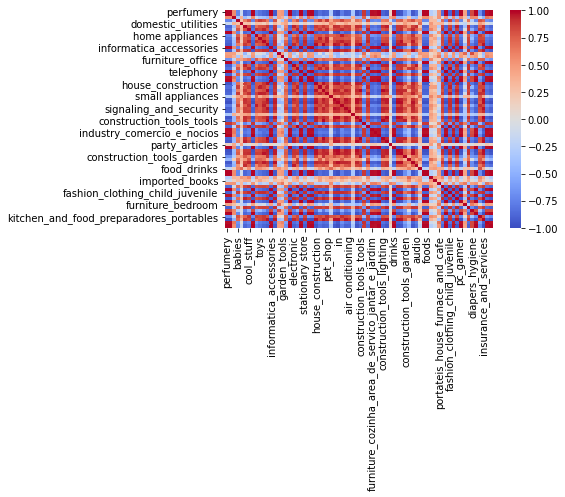

In [ ]:
sns.heatmap(similarities_df.corr("pearson").round(2), cmap = 'coolwarm', annot = False, vmin=-1, vmax=1)

In [ ]:
get_similarity = lambda x: similarities_df[x]

## <b>3 <span style='color:#F1A424'>|</span> Entity Relationship Diagrams & Preview</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>3.1 |</span></b> Previewing Datasets</b></p>
</div>

- According to the below Entity Relationship Diagram, we preview tables utilized for this analysis

<p align="center">
    <img src="https://i.imgur.com/HRhd2Y0.png" alt="Olist dataset ERD" height="600px">
</p>

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#D3455B'>3.2 |</span></b> olist_orders_dataset</b></p>
</div>

In [ ]:
orders = pd.read_csv("datasets/olist_orders_dataset.csv")
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1AAE9F'>3.3 |</span></b> olist_order_customer_dataset</b></p>
</div>

In [ ]:
orderCustomers = pd.read_csv("datasets/olist_customers_dataset.csv")
orderCustomers

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#BD34D1'>3.4 |</span></b> olist_order_reviews_dataset</b></p>
</div>

In [ ]:
orderReviews = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
orderReviews

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#788896'>3.5 |</span></b> olist_order_payments_dataset</b></p>
</div>

In [ ]:
orderPayments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
orderPayments

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#E8973A'>3.6 |</span></b> olist_order_items_dataset</b></p>
</div>

In [ ]:
orderItems = pd.read_csv("datasets/olist_order_items_dataset.csv")
orderItems

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F7C325'>3.7 |</span></b> olist_products_dataset</b></p>
</div>

In [ ]:
products = pd.read_csv("datasets/olist_products_dataset.csv")
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#1AAE9F'>3.8 |</span></b> olist_sellers_dataset</b></p>
</div>

In [ ]:
#TEAL_NUMBER_2
sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")
sellers

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#2C88D9'>3.9 |</span></b> olist_geolocation_dataset</b></p>
</div>

In [ ]:
geolocation = pd.read_csv("datasets/olist_geolocation_dataset.csv")
geolocation

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

## <b>4 <span style='color:#F1A424'>|</span> Merging Datasets</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.1 |</span></b> Merging Individual Tables</b></p>
</div>

- First, the <span style='color:#BD34D1'>olist_order_reviews_dataset</span> and <span style='color:#D3455B'>olist_orders_dataset</span> are merged using an outer merge on the shared key of `order_id` for both tables
- Next <span style='color:#788896'>olist_order_payments_dataset</span> is merged on the previously merged tables using an outer merge on the `order_id` shared key

In [ ]:
purpleRedMerge = orders.merge(orderReviews, how = 'outer', left_on = 'order_id', right_on = 'order_id')
purpleRedMerge['review_score'].fillna(3.5, inplace=True)
purpleRedMerge

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99987  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99988  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99989  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99990  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99991  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99987    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99988    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99989    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99990    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99991    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99987          2017-03-10 11:18:03           2017-03-17 15:08:01   
99988          2018-02-07 23:22:42           2018-02-28 17:37:56   
99989          2017-08-28 20:52:26           2017-09-21 11:24:17   
99990          2018-01-12 15:35:03           2018-01-25 23:32:54   
99991          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                         review_id  \
0               2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1               2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
2               2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
3               2017-12-15 00:00:00  359d03e676b3c069f62cadba8dd3f6e8   
4               2018-02-26 00:00:00  e50934924e227544ba8246aeb3770dd4   
...                             ...                               ...   
99987           2017-03-28 00:00:00  e262b3f92d1ce917aa412a9406cf61a6   
99988           2018-03-02 00:00:00  29bb71b2760d0f876dfa178a76bc4734   
99989           2017-09-27 00:00:00  371579771219f6db2d830d50805977bb   
99990           2018-02-15 00:00:00  8ab6855b9fe9b812cd03a480a25058a1   
99991           2018-04-03 00:00:00  dc9c59b4688062c25758c2be4cafc523   

       review_score review_comment_title  \
0               4.0                  NaN   
1               4.0     Muito boa a loja   
2               5.0                  NaN   
3               5.0                  NaN   
4               5.0                  NaN   
...             ...                  ...   
99987           5.0                  NaN   
99988           4.0                  NaN   
99989           5.0                  NaN   
99990           2.0                  NaN   
99991           5.0                  NaN   

                                  review_comment_message review_cr

In [ ]:
purpleRedGreyMerge = purpleRedMerge.merge(orderPayments, how = "outer", left_on = "order_id", right_on = "order_id")

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.2 |</span></b> Further Merges & Drops</b></p>
</div>

- <span style='color:#1AAE9F'>olist_order_customer_dataset</span> is merged on the previously combined tables through an outer merge on `customer_id` as the shared key with duplicates and null values then dropped
- The <b>temporary</b> table `teal2BlueMerge` is created by merging together <span style='color:#1AAE9F'>olist_sellers_dataset</span> and <span style='color:#2C88D9'>olist_geolocation_dataset</span> through an outer merge, left on `seller_zip_code_prefix` and right on `geolocation_zip_code_prefix` with dulicates and null values then dropped
- As before, another <b>temporary</b> dataframe is created, merging <span style='color:#E8973A'>olist_order_items_dataset</span> and <span style='color:#F7C325'>olist_products_dataset</span> using an outer merge on the shared key `order_id`
- The two previously created <b>temporary</b> tables are merged together on an outer merge on the shared key `seller_id`

In [ ]:
teal1PurpleRedGreyMerge = pd.merge(orderCustomers, purpleRedGreyMerge, how = "outer", left_on = 'customer_id', right_on = 'customer_id')
teal1PurpleRedGreyMerge = teal1PurpleRedGreyMerge.drop_duplicates(subset=['customer_id'])
teal1PurpleRedGreyMerge = teal1PurpleRedGreyMerge.dropna(subset=['customer_id'])
teal1PurpleRedGreyMerge

In [ ]:
teal2BlueMerge = pd.merge(sellers, geolocation, how='outer', left_on = 'seller_zip_code_prefix', right_on = 'geolocation_zip_code_prefix')
teal2BlueMerge = teal2BlueMerge.drop_duplicates(subset=['seller_id'])
teal2BlueMerge = teal2BlueMerge.dropna(subset=['seller_id'])
teal2BlueMerge

seller_id  seller_zip_code_prefix  \
0       3442f8959a84dea7ee197c632cb2df15                 13023.0   
80      e0eabded302882513ced4ea3eb0c7059                 13023.0   
160     d1b65fc7debc3361ea86b5f14c68d2e2                 13844.0   
263     ce3ad9de960102d0677a81f5d0bb7b2d                 20031.0   
650     1d2732ef8321502ee8488e8bed1ab8cd                 20031.0   
...                                  ...                     ...   
434730  f1fdf2d13186575751aa25876536d85c                  5314.0   
434792  98dddbc4601dd4443ca174359b237166                 87111.0   
434860  74871d19219c7d518d0090283e03c137                  4650.0   
434928  e603cf3fec55f8697c9059638d6c8eb5                 96080.0   
435024  9e25199f6ef7e7c347120ff175652c3b                 12051.0   

           seller_city seller_state  geolocation_zip_code_prefix  \
0             campinas           SP                      13023.0   
80            campinas           SP                      13023.0   
160         mogi guacu           SP                      13844.0   
263     rio de janeiro           RJ                      20031.0   
650     rio de janeiro           RJ                      20031.0   
...                ...          ...                          ...   
434730       sao paulo           SP                       5314.0   
434792         sarandi           PR                      87111.0   
434860       sao paulo           SP                       4650.0   
434928         pelotas           RS                      96080.0   
435024         taubate           SP                      12051.0   

        geolocation_lat  geolocation_lng geolocation_city geolocation_state  
0            -22.898536       -47.063125         campinas                SP  
80           -22.898536       -47.063125         campinas                SP  
160          -22.382941       -46.946641       mogi-guacu                SP  
263          -22.910641       -43.176510   rio de janeiro                RJ  
650          -22.910641       -43.176510   rio de janeiro                RJ  
...                 ...              ...              ...               ...  
434730       -23.534949       -46.733916        sao paulo                SP  
434792       -23.456431       -51.866369          sarandi                PR  
434860       -23.659845       -46.677882        sao paulo                SP  
434928       -31.744231       -52.328761          pelotas                RS  
435024       -23.016003       -45.582021          taubate                SP  

[3095 rows x 9 columns]

In [ ]:
orangeYellowMerge = pd.merge(orderItems, products, how='outer', left_on = 'product_id', right_on = 'product_id')
orangeYellowMerge['product_category_name'].fillna(value="", inplace=True)
orangeYellowMerge.fillna(value=0, inplace=True)
orangeYellowMerge

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
112645  ffebd80e3291e811c308365936897efd              1   
112646  ffee31fb4b5e35c9123608015637c495              1   
112647  fff7c4452f050315db1b3f24d9df5fcd              1   
112648  fffa82886406ccf10c7b4e35c4ff2788              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
112645  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e   
112646  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd   
112647  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a   
112648  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  price  freight_value product_category_name  \
0       2017-09-19 09:45:35   58.9          13.29            cool_stuff   
1       2017-07-05 02:44:11   55.9          17.96            cool_stuff   
2       2018-05-23 10:56:25   64.9          18.33            cool_stuff   
3       2017-08-07 18:55:08   58.9          16.17            cool_stuff   
4       2017-08-16 22:05:11   58.9          13.29            cool_stuff   
...                     ...    ...            ...                   ...   
112645  2018-07-18 20:23:55  129.9          51.20    ferramentas_jardim   
112646  2018-08-21 10:10:11   99.0          13.52      moveis_decoracao   
112647  2017-06-07 17:05:23  736.0          20.91    relogios_presentes   
112648  2017-12-22 17:31:42  229.9          44.02         esporte_lazer   
112649  2018-06-12 17:10:13   43.0          12.79       cama_mesa_banho   

        product_name_lenght  product_description_lenght  product_photos_qty  \
0                      58.0                       598.0                 4.0   
1                      58.0                       598.0                 4.0   
2                      58.0                       598.0                 4.0   
3                      58.0                       598.0                 4.0   
4                      58.0                       598.0                 4.0   
...                     ...                         ...                 ...   
112645                 37.0                       653.0                 1.0   
112646                 30.0                       308.0                 1.0   
112647                 33.0                       658.0                 3.0   
112648                 32.0                       280.0                 2.0   
112649                 47.0                       511.0                 1.0   

        product_weight_g  product_length_cm  product_height_cm  \
0                  650.0               28.0                9.0   
1                  650.0               28.0                9.0   
2                  650.0               28.0                9.0   
3                  650.0               28.0                9.0   
4                  650.0               28.0                9.0   
...                  ...                ...                ...   
112645            6700.0               35.0               12.0   
112646  

In [ ]:
teal2BlueOrangeYellowMerge = pd.merge(orangeYellowMerge, teal2BlueMerge, how='outer', left_on = 'seller_id', right_on = 'seller_id')
teal2BlueOrangeYellowMerge = teal2BlueOrangeYellowMerge.drop(labels = ["seller_state", "geolocation_state", "geolocation_zip_code_prefix", "geolocation_city"], axis = 1)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>4.3 |</span></b> Final Merges & Drops</b></p>
</div>

- Finally, the two created <b>temporary</b> tables are merged through an outer merge on the shared key `order_id`
- For this analysis, many columns of ths final table are not needed and thus dropped
- This final table is then exported as a `.csv` file

In [ ]:
finalMerge = pd.merge(teal2BlueOrangeYellowMerge, teal1PurpleRedGreyMerge, how='outer', left_on = "order_id", right_on = "order_id")
finalMerge.info()
finalMerge

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   order_item_id                  112650 non-null  float64
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          112650 non-null  object 
 8   product_name_lenght            112650 non-null  float64
 9   product_description_lenght     112650 non-null  float64
 10  product_photos_qty             112650 non-null  float64
 11  product_weight_g               112650 non-null  float64
 12  product_length_cm             

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214            1.0   
1       130898c0987d1801452a8ed92a670612            1.0   
2       532ed5e14e24ae1f0d735b91524b98b9            1.0   
3       6f8c31653edb8c83e1a739408b5ff750            1.0   
4       7d19f4ef4d04461989632411b7e588b9            1.0   
...                                  ...            ...   
113420  2f634e2cebf8c0283e7ef0989f77d217            NaN   
113421  2b0edc4c59d83dcef85466718c36a317            NaN   
113422  81b7c7bbc8ec003eeb67d87441a6a148            NaN   
113423  8b08f0e729f58529ed03e763270f78d5            NaN   
113424  9b932dca249f9971b86dde2f2d7ad412            NaN   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
113420                               NaN                               NaN   
113421                               NaN                               NaN   
113422                               NaN                               NaN   
113423                               NaN                               NaN   
113424                               NaN                               NaN   

        shipping_limit_date  price  freight_value product_category_name  \
0       2017-09-19 09:45:35   58.9          13.29            cool_stuff   
1       2017-07-05 02:44:11   55.9          17.96            cool_stuff   
2       2018-05-23 10:56:25   64.9          18.33            cool_stuff   
3       2017-08-07 18:55:08   58.9          16.17            cool_stuff   
4       2017-08-16 22:05:11   58.9          13.29            cool_stuff   
...                     ...    ...            ...                   ...   
113420                  NaN    NaN            NaN                   NaN   
113421                  NaN    NaN            NaN                   NaN   
113422                  NaN    NaN            NaN                   NaN   
113423                  NaN    NaN            NaN                   NaN   
113424                  NaN    NaN            NaN                   NaN   

        product_name_lenght  product_description_lenght  ...  \
0                      58.0                       598.0  ...   
1                      58.0                       598.0  ...   
2                      58.0                       598.0  ...   
3                      58.0                       598.0  ...   
4                      58.0                       598.0  ...   
...                     ...                         ...  ...   
113420                  NaN                         NaN  ...   
113421                  NaN                         NaN  ...   
113422                  NaN                         NaN  ...   
113423                  NaN                         NaN  ...   
113424                  NaN                         NaN  ...   

                               review_id  review_score  review_comment_title  \
0       97ca439bc427b48bc1cd7177abe71365           5.0                   NaN   
1       b11cba360bbe71410c291b764753d37f           5.0                   NaN   
2       af01c4017c5ab46df6cc810e069e654a           4.0       super recomendo   
3       8304ff37d8b16b57086fa283fe0c44f8           5.0                   NaN   
4       426f43a82185969503fb3c86241a9535           5.0                   NaN   
...                                  ...           ...                   ...   
113420  44c6d194170df31929a4ab4b7ae8512a           1.0                   NaN   
113421  62729f1cf3b504674bb4043189c4416f           2.0                   NaN

In [ ]:
finalMergedata = finalMerge.drop(['order_id', 'order_item_id', 'seller_id', 'shipping_limit_date',
                                  'seller_zip_code_prefix', 'seller_city', 'customer_id', 'customer_zip_code_prefix', 'customer_city',
                                  'customer_state', 'order_status', 'order_purchase_timestamp','review_id',
                                  'order_purchase_timestamp', 'review_comment_title',
                                  'review_comment_message', 'order_approved_at', 'review_creation_date',
                                  'payment_type', 'payment_installments', 'order_delivered_carrier_date',
                                  'order_delivered_customer_date', 'order_estimated_delivery_date',
                                  'review_answer_timestamp', 'payment_sequential'], axis=1)

In [ ]:
finalMergedata.to_csv(index=True)

## <b>5 <span style='color:#F1A424'>|</span> Imputing Missing Values & Train Test Split</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.1 |</span></b> KNN Imputation</b></p>
</div>

- Below the `sklearn.KNNImputer` package is used to imput missing numerical values from the final dataframe using `n=5` nearest neighbors
- All remaining null or missing values are dropped

In [ ]:
to_impute = finalMergedata[['product_name_lenght', 'product_description_length', 'product_photos_qty', 
                           'geolocation_lat', 'geolocation_lng']]

imputer = KNNImputer(n_neighbors=5)
impute_fit = imputer.fit_transform(to_impute)

finalMergedata['product_category_name'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
finalMergedata['product_category_name'].fillna(value="other", inplace= True)

finalMergedata[['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
                           'geolocation_lat', 'geolocation_lng']] = impute_fit

finalMergedata = finalMergedata.dropna()
finalMergedata

product_id   price  freight_value  \
0       4244733e06e7ecb4970a6e2683c13e61    58.9          13.29   
1       4244733e06e7ecb4970a6e2683c13e61    55.9          17.96   
2       4244733e06e7ecb4970a6e2683c13e61    64.9          18.33   
3       4244733e06e7ecb4970a6e2683c13e61    58.9          16.17   
4       4244733e06e7ecb4970a6e2683c13e61    58.9          13.29   
...                                  ...     ...            ...   
112645  f739e9151702508b18f796c53005e5e9   119.9          16.14   
112646  f4135cbdece8245560f7be179533797a   209.0          16.21   
112647  69c590f7ffc7bf8db97190b6cb6ed62e  6729.0         193.21   
112648  5ff4076c0f01eeba4f728c9e3fa2653c    27.9          14.44   
112649  5ff4076c0f01eeba4f728c9e3fa2653c    27.9          14.44   

       product_category_name  product_name_lenght  product_description_lenght  \
0                 cool_stuff                 58.0                       598.0   
1                 cool_stuff                 58.0                       598.0   
2                 cool_stuff                 58.0                       598.0   
3                 cool_stuff                 58.0                       598.0   
4                 cool_stuff                 58.0                       598.0   
...                      ...                  ...                         ...   
112645      moveis_decoracao                 44.0                       533.0   
112646           eletronicos                 32.0                      1306.0   
112647                   pcs                 50.0                      1935.0   
112648               bebidas                 28.0                       242.0   
112649               bebidas                 28.0                       242.0   

        product_photos_qty  product_weight_g  product_length_cm  \
0                      4.0             650.0               28.0   
1                      4.0             650.0               28.0   
2                      4.0             650.0               28.0   
3                      4.0             650.0               28.0   
4                      4.0             650.0               28.0   
...                    ...               ...                ...   
112645                 2.0            1000.0               69.0   
112646                 3.0             500.0               17.0   
112647                 4.0            5660.0               54.0   
112648                 1.0            2000.0               19.0   
112649                 1.0            2000.0               19.0   

        product_height_cm  product_width_cm  geolocation_lat  geolocation_lng  \
0                     9.0              14.0       -22.498183       -44.123614   
1                     9.0              14.0       -22.498183       -44.123614   
2                     9.0              14.0       -22.498183       -44.123614   
3                     9.0              14.0       -22.498183       -44.123614   
4                     9.0              14.0       -22.498183       -44.123614   
...                   ...               ...              ...              ...   
112645               11.0              11.0       -25.450057       -49.260674   
112646                9.0              25.0       -25.379062       -49.227004   
112647               18.0              47.0       -23.306545       -51.153471   
112648               38.0              19.0       -23.567864       -46.592424   
112649               38.0              19.0       -23.567864       -46.592424   

                      customer_unique_id  review_score  payment_value  
0       871766c5855e863f6eccc05f988b23cb           5.0          72.19  
1       0fb8e3eab2d3e79d92bb3fffbb97f188           5.0          73.86  
2       3419052c8c6b45daf79c1e426f9e9bcb           4.0          83.23  
3       e7c828d22c0682c1565252deefbe334d           5.0          75.07  
4       0bb98ba72dcc08e95f9d8cc434e9a2cc           5.0          72.19  
...                                  ...  

In [ ]:
finalMergedata[finalMergedata['product_category_name'].isin(og_name_to_idx.keys())]

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>5.2 |</span></b> Label Encoding Non-Numeric Values</b></p>
</div>

- the `LabelEncoder` class from the `sklearn.preprocessing` module is used to encode non-numeric values
- Predictors (in the form of customer IDs) and classes (in the form of a matrix of product information) is created to be used in the model

In [ ]:
training_data = finalMergedata.drop('customer_unique_id')

In [ ]:
training_data = training_data.groupby(['product_id', 'product_category_name']).mean().reset_index()
training_data

In [ ]:
product_id_le = preprocessing.LabelEncoder()
product_id_le.fit(training_data['product_id'].to_numpy())
training_data['product_id'] = product_id_le.transform(training_data['product_id'].to_numpy())

cat_le = preprocessing.LabelEncoder()
cat_le.fit(training_data['product_category_name'].to_numpy())
training_data['product_category_name'] = cat_le.transform(training_data['product_category_name'].to_numpy())

training_data

In [ ]:
len(pd.unique(training_data['product_id']))

In [ ]:
y = training_data.iloc[:, 0].to_numpy()
X = training_data.iloc[:, 1:].to_numpy()
X, y

## <b>6 <span style='color:#F1A424'>|</span> KNN Classifier Model & Recommender System</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>6.1 |</span></b> k-Nearest Neighbor Model</b></p>
</div>

- The basic outline for a KNN classifier is presented, with a `metric` parameter modifying the distances of each product (and associated product category), increasing the distance for an object with less cosine similarity, and decreasing the distance for two products with categories of higher cosine similarity

In [ ]:
weights = np.array([20000000, 40, 30, 1, 1, 20, 10, 10, 10, 10, 30, 30, 1, 10])

def metric(u, v):
  cat_name_u = cat_le.inverse_transform([int(u[0])])
  cat_name_v = cat_le.inverse_transform([int(v[0])])

  u_v = u - v
  u_v = np.multiply(u_v, weights)

  u_v[0] = 20000000 - similarities_df[og_name_to_idx[cat_name_u[0]]][og_name_to_idx[cat_name_v[0]]]      
  u_v[11] = 5 - u_v[11] * 40
      
  dist = norm(u_v)
  return dist

neigh = KNeighborsClassifier(n_neighbors=4, metric=metric)
neigh.fit(X, y)

In [ ]:
probs = neigh.predict_proba([[63,101.65,18.590,53.0,596.0,6.0,300.0,20.0,16.0,16.0,-23.537922,-46.477696,5.0,120.240]])
probs

In [ ]:
ind = np.argpartition(probs[0], -4)[-4:]
ind

In [ ]:
display(training_data[(finalMergedata['product_id'] == 9281) | 
                       (finalMergedata['product_id'] == 18733) | 
                       (finalMergedata['product_id'] == 29589) | 
                       (finalMergedata['product_id'] == 0)])


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://miro.medium.com/v2/resize:fit:1024/format:webp/1*WO2tpR1ElY2QcVLQrhwbpQ.jpeg)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#F1A424'>6.2 |</span></b> Recommender System</b></p>
</div>

- Finally, everything is put together to obtain a recommendation based on the specific parameters of an individual customer which is implemented in the `get_recommendation` function
- As per the request of this datathon, only the top 3 recommendations are returned
- Another function is defined, `get_recommendation_for_group` allowing the input of a group of customer IDs for tailored recommendations to each customer 

In [ ]:
customer_order_info = finalMergedata

customer_order_info = customer_order_info.dropna()
customer_order_info

In [ ]:
# input 1 customer id, get a list of recommendation, return none is customer has no previous order
def get_recommendation(customer_id):
    specific_customer_order_info = customer_order_info[customer_order_info['customer_unique_id'] == customer_id]
    # use product with review >= 3
    specific_customer_order_info = specific_customer_order_info[specific_customer_order_info['review_score'] >= 3]

    # sort by review score, break ties with most recent purcahse
    specific_customer_order_info = specific_customer_order_info.sort_values(['review_score', 'order_purchase_timestamp'], ascending=False)

    # drop extra info we don't need and encode
    specific_customer_order_info = specific_customer_order_info.drop(['customer_unique_id', 'order_purchase_timestamp'], axis=1)
    specific_customer_order_info['product_id'] = product_id_le.transform(specific_customer_order_info['product_id'].to_numpy())
    specific_customer_order_info['product_category_name'] = cat_le.transform(specific_customer_order_info['product_category_name'].to_numpy())
    specific_customer_order_info = specific_customer_order_info.reindex(finalMergedata.columns, axis=1)
    purchased_product = specific_customer_order_info['product_id']

    # use top 3
    index = 4
    probs = neigh.predict_proba(specific_customer_order_info.iloc[:3, 1:].to_numpy())
    probs = np.sum(probs, axis=0)

    probs[purchased_product.to_numpy()] = 0

    ind = np.argpartition(probs, -5)[-5:]
    while (probs[ind] > 0).sum() < 5 and index < specific_customer_order_info.shape[0]:
        probs = neigh.predict_proba(specific_customer_order_info.iloc[:index, 1:].to_numpy())
        probs = np.sum(probs, axis=0)

        probs[purchased_product.to_numpy()] = 0
        ind = np.argpartition(probs, -5)[-5:]

        index += 1 
        
    return product_id_le.inverse_transform(ind)


In [ ]:
recommend = get_recommendation('290c77bc529b7ac935b93aa66c333dc3')
display(customer_order_info[customer_order_info['customer_unique_id'] == '290c77bc529b7ac935b93aa66c333dc3'])
customer_order_info[customer_order_info['product_id'].isin(recommend)]

In [ ]:
def get_recommendation_for_group(customer_ids):
  specific_customer_order_info = customer_order_info[customer_order_info['customer_unique_id'].isin(customer_ids)]
  bought = specific_customer_order_info['product_id']

  recommendation = np.array([])
  for id in customer_ids:
    rec = get_recommendation(id)
    print(id, rec)
    recommendation = np.append(recommendation, get_recommendation(id))

  recommendation = np.unique(recommendation)
  # filter out bought items
  recommendation = recommendation[np.logical_not(np.isin(recommendation, bought.to_numpy()))]
  return recommendation

In [ ]:
customer_ids = ['290c77bc529b7ac935b93aa66c333dc3', '0fb8e3eab2d3e79d92bb3fffbb97f188', '3419052c8c6b45daf79c1e426f9e9bcb']
recommendation = get_recommendation_for_group(customer_ids)
recommendation

In [ ]:
display(customer_order_info[customer_order_info['customer_unique_id'].isin(customer_ids)])
products[products['product_id'].isin(recommendation)]